In [40]:
import pandas as pd
import numpy as np
from pathlib import Path
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ Jupyter está funcionando")
print("Versión de pandas:", pd.__version__)

sales = pd.read_csv("../data/fact_sales.csv")
sales.head()

✅ Jupyter está funcionando
Versión de pandas: 2.3.3


,sale_line_id,store_id,product_id,qty_sold,unit_price_usd,line_revenue_usd,order_date
0,500001,30,1488,1,19.91,19.91,2025-04-19
1,500002,40,1221,1,17.55,17.55,2025-04-29
2,500003,50,1370,4,11.90,47.60,2025-06-04
3,500004,40,1266,1,21.66,21.66,2025-01-14
4,500005,30,1470,1,9.64,9.64,2025-08-14


In [42]:
# Leemos las tablas clave
sales = pd.read_csv("../data/fact_sales.csv")
products = pd.read_csv("../data/dim_product.csv")
stores = pd.read_csv("../data/dim_store.csv")

# Fusionamos para tener contexto
df = (sales
      .merge(products, on="product_id")
      .merge(stores, on="store_id"))

df.head()

,sale_line_id,store_id,product_id,qty_sold,unit_price_usd,line_revenue_usd,order_date,sku,product_name,category,unit,avg_unit_cost_usd,store_name,city,state,open_date
0,500001,30,1488,1,19.91,19.91,2025-04-19,PRO-1488,Produce Item 1488,Produce,lb,5.75,Fort Lauderdale,Fort Lauderdale,FL,2023-01-10
1,500002,40,1221,1,17.55,17.55,2025-04-29,PRO-1221,Produce Item 1221,Produce,lb,5.49,Miami Wynwood,Miami,FL,2020-11-05
2,500003,50,1370,4,11.90,47.60,2025-06-04,BAK-1370,Bakery Item 1370,Bakery,unit,3.72,Boca Raton,Boca Raton,FL,2022-09-20
3,500004,40,1266,1,21.66,21.66,2025-01-14,PRO-1266,Produce Item 1266,Produce,lb,6.19,Miami Wynwood,Miami,FL,2020-11-05
4,500005,30,1470,1,9.64,9.64,2025-08-14,PRO-1470,Produce Item 1470,Produce,lb,3.20,Fort Lauderdale,Fort Lauderdale,FL,2023-01-10


In [ ]:
# Cleaning Data

In [43]:
df['order_date'] = pd.to_datetime(df['order_date'])
df = df[df['qty_sold'] > 0]
df= df[df['unit_price_usd'] > 0]
df['total_revenue'] = df['qty_sold'] * df['unit_price_usd']
df.describe().T



,count,mean,min,25%,50%,75%,max,std
sale_line_id,80000.0,540000.5,500001.0,520000.75,540000.5,560000.25,580000.0,23094.155105
store_id,80000.0,34.980125,10.0,20.0,30.0,50.0,60.0,17.069659
product_id,80000.0,1250.770387,1001.0,1127.0,1251.0,1375.0,1500.0,144.089095
qty_sold,80000.0,1.8084,1.0,1.0,1.0,2.0,10.0,1.121909
unit_price_usd,80000.0,14.809065,1.86,6.64,10.28,16.51,94.97,13.853783
line_revenue_usd,80000.0,25.188419,1.89,9.3,16.17,30.4,542.28,28.311652
order_date,80000,2025-05-19 08:27:02.520000256,2025-01-01 00:00:00,2025-03-11 00:00:00,2025-05-19 00:00:00,2025-07-28 00:00:00,2025-10-05 00:00:00,NaN
avg_unit_cost_usd,80000.0,4.855172,0.81,2.17,3.47,5.33,25.0,4.442112
total_revenue,80000.0,25.188419,1.89,9.3,16.17,30.4,542.28,28.311652


In [25]:

  # para copiar archivos (backup)

# Ruta base donde están tus CSV
base_dir = Path("C:/Users/diego/OneDrive/Desktop/restaurante_inteligente_python/data")

# Archivos y llaves primarias
mapeo = {
    "dim_product.csv":   ["product_id"],
    "dim_store.csv":     ["store_id"],
    "dim_vendor.csv":    ["vendor_id"],
    "dim_employee.csv":  ["employee_id"],
}

resumen = []
for archivo, pk_cols in mapeo.items():
    ruta = base_dir / archivo
    if not ruta.exists():
        print(f"⚠️ No encontrado: {ruta}")
        continue

    # Crear backup antes de tocarlo
    backup_path = ruta.with_name(ruta.stem + "_backup.csv")
    shutil.copy2(ruta, backup_path)

    # Leer CSV
    df = pd.read_csv(ruta)
    n0 = len(df)

    # Eliminar duplicados por PK
    df_clean = df.drop_duplicates(subset=pk_cols, keep="first")
    n1 = len(df_clean)
    eliminados = n0 - n1

    # Sobrescribir archivo original con el limpio
    df_clean.to_csv(ruta, index=False, encoding="utf-8")

    resumen.append({
        "archivo": archivo,
        "pk": ",".join(pk_cols),
        "filas_originales": n0,
        "filas_finales": n1,
        "duplicados_eliminados": eliminados,
        "backup": str(backup_path)
    })

print("✅ Limpieza completada y archivos reemplazados. Se crearon respaldos por seguridad.")
pd.DataFrame(resumen)


✅ Limpieza completada y archivos reemplazados. Se crearon respaldos por seguridad.


,archivo,pk,filas_originales,filas_finales,duplicados_eliminados,backup
0,dim_product.csv,product_id,500,500,0,C:\Users\diego\OneDrive\Desktop\restaurante_in...
1,dim_store.csv,store_id,6,6,0,C:\Users\diego\OneDrive\Desktop\restaurante_in...
2,dim_vendor.csv,vendor_id,20,20,0,C:\Users\diego\OneDrive\Desktop\restaurante_in...
3,dim_employee.csv,employee_id,1800,1800,0,C:\Users\diego\OneDrive\Desktop\restaurante_in...


In [ ]:
# Key Visualizations


In [29]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [30]:
# Sales by Month

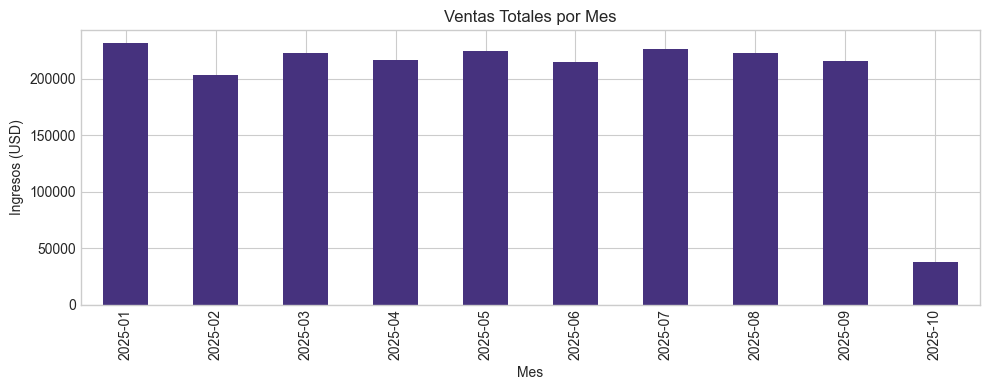

In [44]:
df.groupby(df['order_date'].dt.to_period('M'))['total_revenue'].sum().plot(kind='bar', figsize=(10,4))
plt.title("Ventas Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos (USD)")
plt.tight_layout()
plt.show()


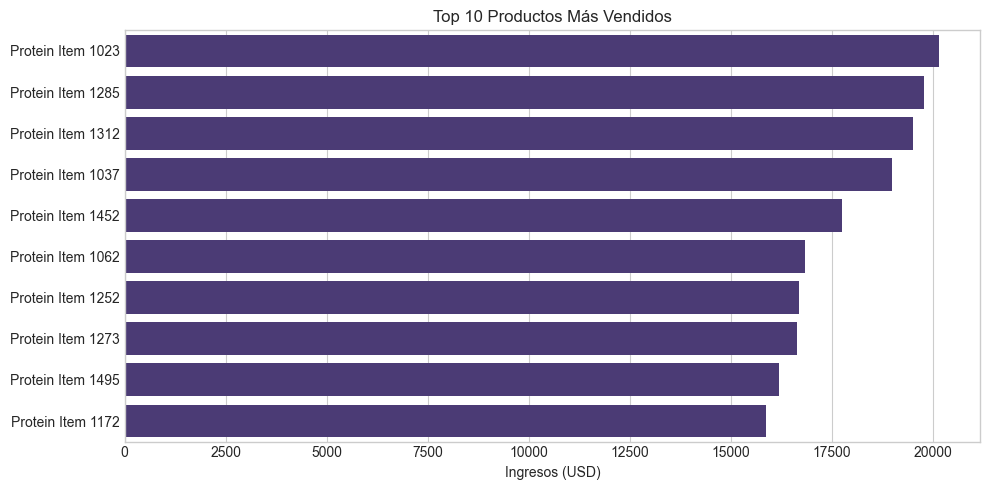

In [ ]:
# TOP 10 Products Sales
top_products = df.groupby('product_name')['total_revenue'].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Ingresos (USD)")
plt.ylabel("")
plt.tight_layout()
plt.show()





# Store Sales

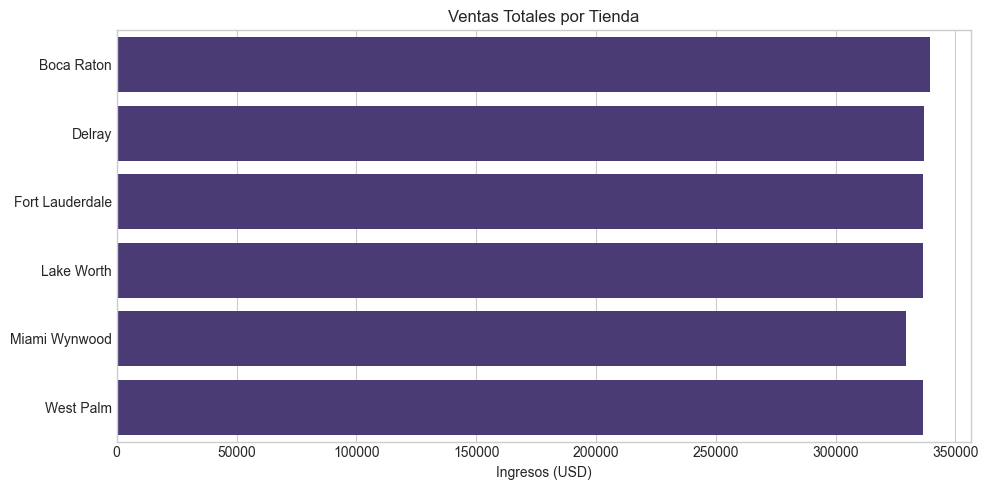

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby('store_name', as_index=False)['total_revenue'].sum(),
            x='total_revenue', y='store_name')
plt.title("Ventas Totales por Tienda")
plt.xlabel("Ingresos (USD)")
plt.ylabel("")
plt.tight_layout()
plt.show()


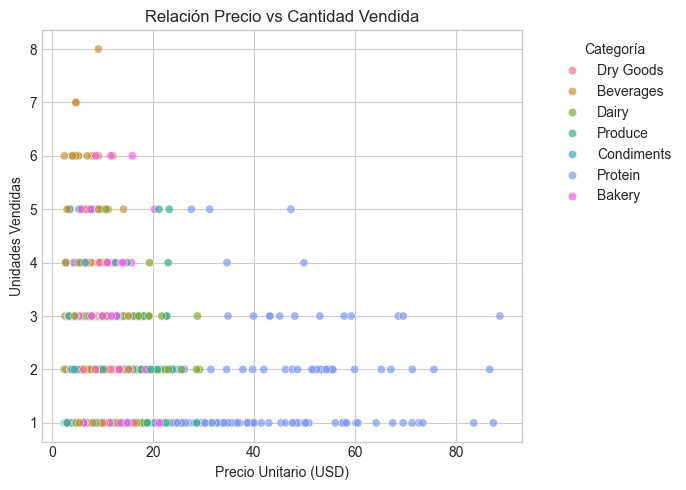

In [47]:
# Price vs Sold Quantity 
plt.figure(figsize=(7,5))
sns.scatterplot(data=df.sample(1000, random_state=42),
                x='unit_price_usd', y='qty_sold', hue='category', alpha=0.7)
plt.title("Relación Precio vs Cantidad Vendida")
plt.xlabel("Precio Unitario (USD)")
plt.ylabel("Unidades Vendidas")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
